# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load CSV File

In [14]:
df=pd.read_csv('avocado.csv')

In [15]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


# Checking Missing values in the Dataset

In [17]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Checking Duplicate Values in the dataset

In [20]:
df.duplicated().sum()

0

# Checking unique values in each column attribute

In [21]:
for column in df.columns:
    print("Unique Columns:",column)
    print(df[column].unique())
    print()

Unique Columns: Unnamed: 0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]

Unique Columns: Date
['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11' '2015-01-04' '2016-12-25' '2016-12-18' '2016-12-11'
 '2016-12-04' '2016-11-27' '2016-11-20' '2016-11-13' '2016-11-

# Visualizations

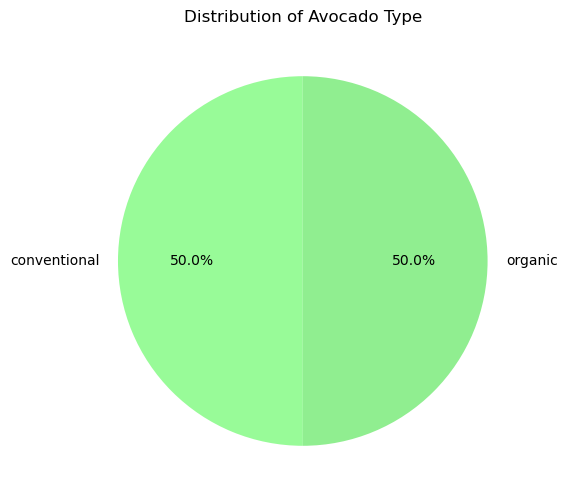

In [29]:
plt.figure(figsize=(6, 6))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#98FB98', '#90EE90'])
plt.title("Distribution of Avocado Type")
plt.ylabel('')
plt.show()

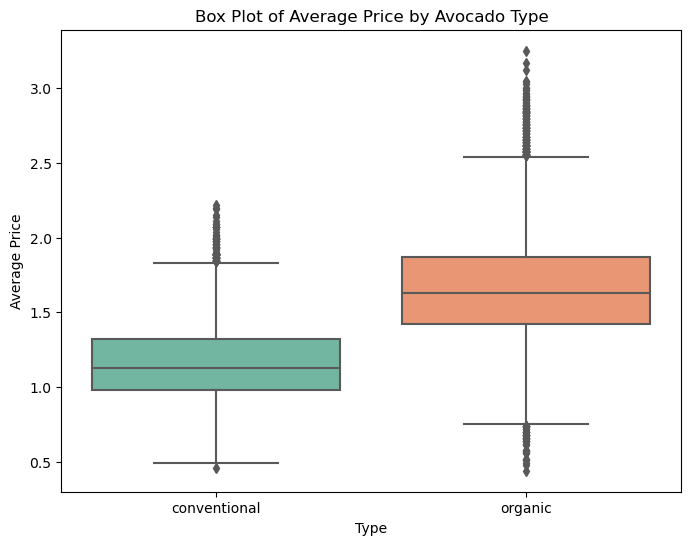

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='type', y='AveragePrice', palette='Set2')
plt.title("Box Plot of Average Price by Avocado Type")
plt.xlabel("Type")
plt.ylabel("Average Price")
plt.show()


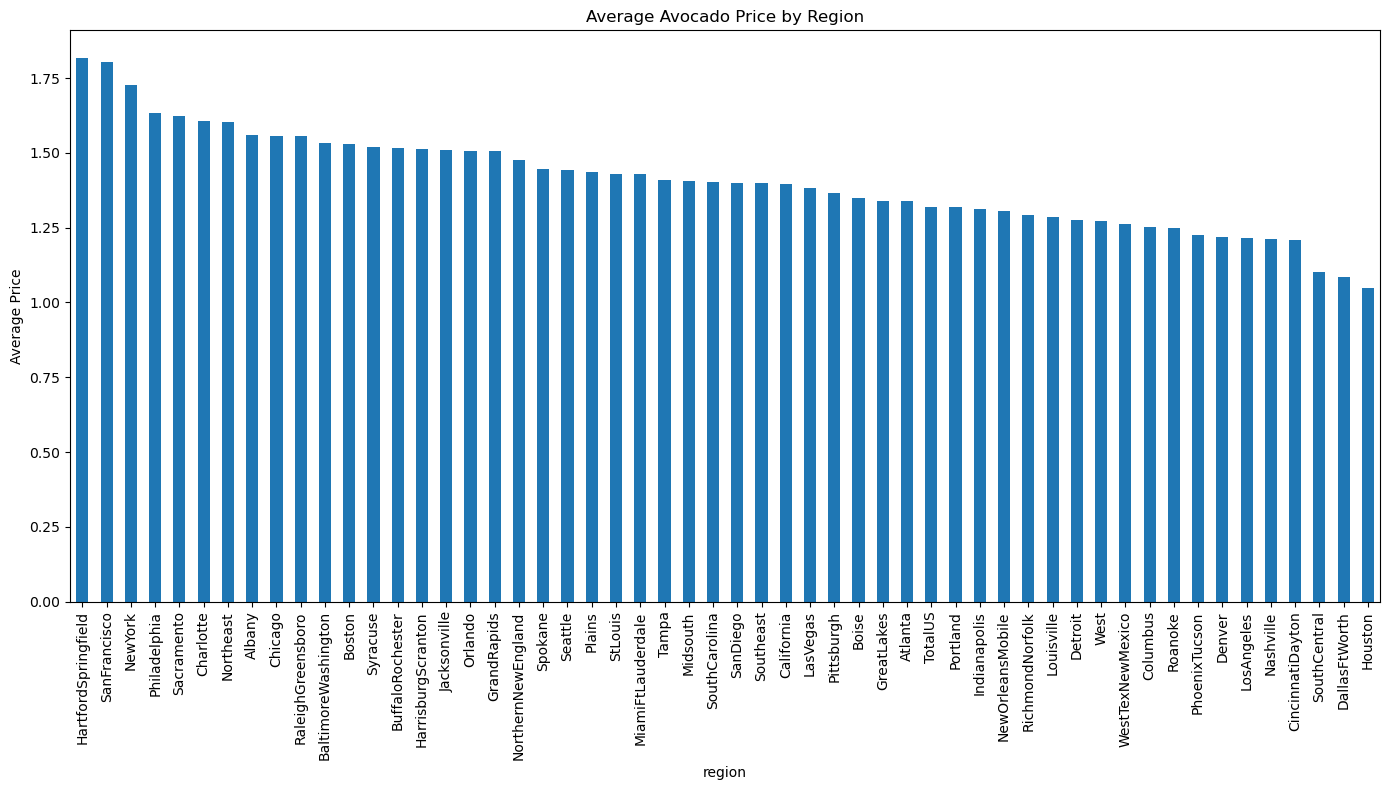

In [24]:
plt.figure(figsize=(14, 8))
region_avg_price = df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False)
region_avg_price.plot(kind='bar')
plt.title("Average Avocado Price by Region")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

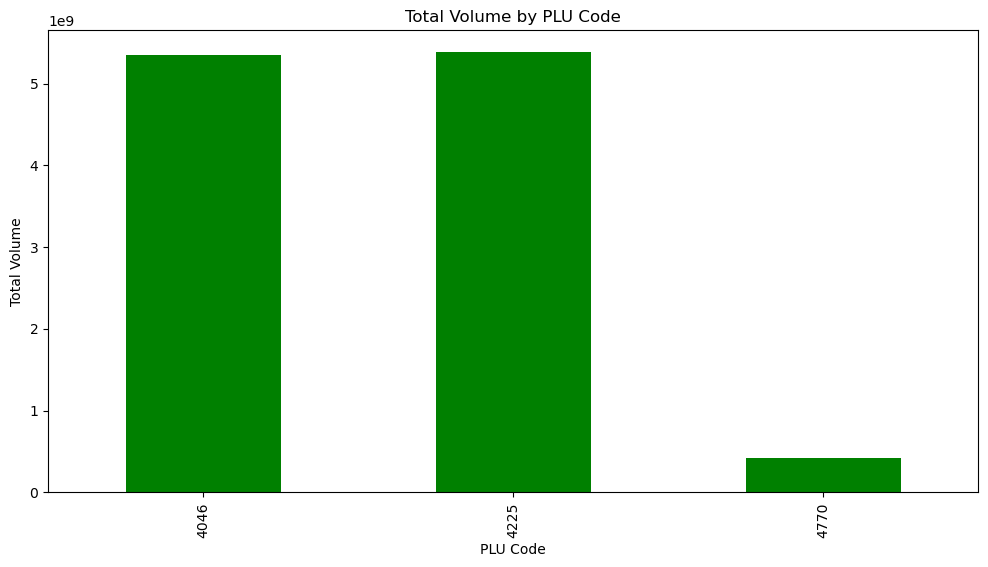

In [25]:
plt.figure(figsize=(12, 6))
df_plu = df[['4046', '4225', '4770']].sum()
df_plu.plot(kind='bar', color='green')
plt.title("Total Volume by PLU Code")
plt.xlabel("PLU Code")
plt.ylabel("Total Volume")
plt.show()

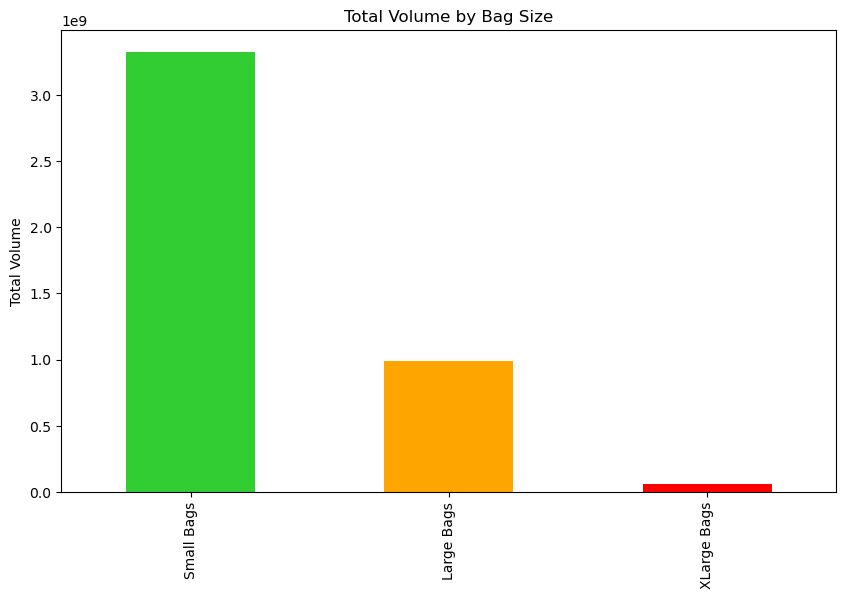

In [26]:
plt.figure(figsize=(10, 6))
df_bags = df[['Small Bags', 'Large Bags', 'XLarge Bags']].sum()
df_bags.plot(kind='bar', color=['limegreen', 'orange', 'red'])
plt.title("Total Volume by Bag Size")
plt.ylabel("Total Volume")
plt.show()

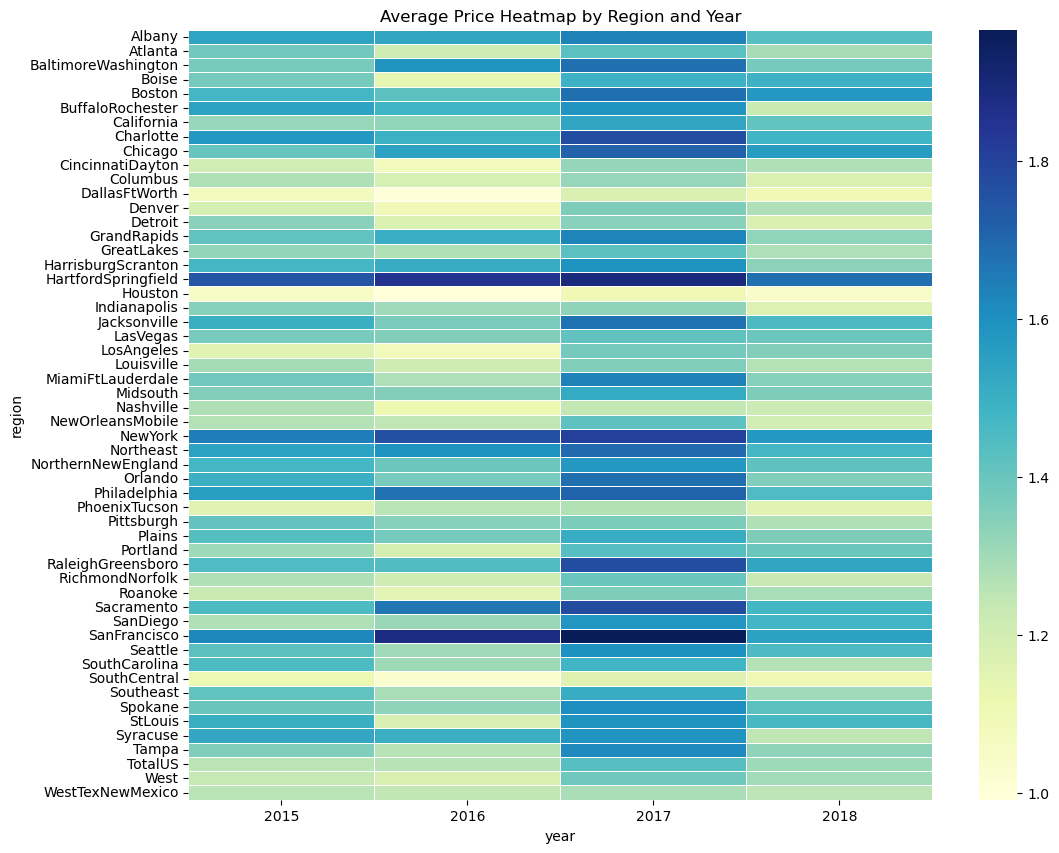

In [28]:
region_year_price = df.pivot_table(index='region', columns='year', values='AveragePrice', aggfunc='mean')
plt.figure(figsize=(12, 10))
sns.heatmap(region_year_price, cmap='YlGnBu', linewidths=0.5)
plt.title("Average Price Heatmap by Region and Year")
plt.show()

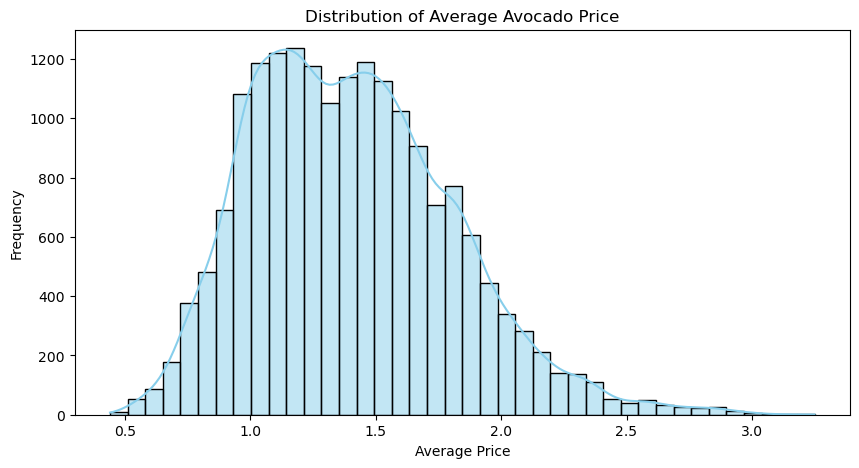

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(df['AveragePrice'], bins=40, kde=True, color='skyblue')
plt.title("Distribution of Average Avocado Price")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.show()

Distribution of Average Avocado Price (Histogram)
Most avocado prices fall within a mid-range around $1.0 to $1.5, with fewer prices at extremes. The distribution is slightly right-skewed with a visible density curve.

# Pivot Tables

In [32]:
price_pivot = df.pivot_table(index='region', columns='year', values='AveragePrice', aggfunc='mean')
print(price_pivot)

year                     2015      2016      2017      2018
region                                                     
Albany               1.538750  1.533942  1.637830  1.435833
Atlanta              1.380577  1.214135  1.428774  1.288750
BaltimoreWashington  1.368846  1.587596  1.679434  1.378333
Boise                1.373750  1.141923  1.492642  1.492500
Boston               1.473558  1.426154  1.679528  1.576667
BuffaloRochester     1.544615  1.483846  1.587736  1.226250
California           1.315865  1.329904  1.533868  1.411250
Charlotte            1.575769  1.497885  1.769811  1.482500
Chicago              1.404038  1.547308  1.714811  1.561667
CincinnatiDayton     1.202308  1.088365  1.319434  1.275833
Columbus             1.273846  1.186346  1.315660  1.171667
DallasFtWorth        1.077885  0.996154  1.176981  1.102917
Denver               1.187788  1.093173  1.357736  1.280833
Detroit              1.338269  1.172404  1.339057  1.177917
GrandRapids          1.416346  1.509327 

In [33]:
volume_pivot = df.pivot_table(index='type', columns='year', values='Total Volume', aggfunc='sum')
print(volume_pivot)

year                  2015          2016          2017          2018
type                                                                
conventional  4.296599e+09  4.690250e+09  4.766166e+09  1.334206e+09
organic       8.886943e+07  1.306401e+08  1.681399e+08  4.853227e+07


In [34]:
bag_volume_pivot = df.pivot_table(
    index='year',
    values=['Small Bags', 'Large Bags', 'XLarge Bags'],
    aggfunc='sum'
)
print(bag_volume_pivot)

        Large Bags    Small Bags  XLarge Bags
year                                         
2015  1.320664e+08  6.346827e+08   5443128.28
2016  3.366263e+08  1.106494e+09  20038284.84
2017  3.993390e+08  1.222953e+09  23997172.34
2018  1.235840e+08  3.607414e+08   7210591.87


In [35]:
region_type_price = df.pivot_table(index='region', columns='type', values='AveragePrice', aggfunc='mean')
print(region_type_price)

type                 conventional   organic
region                                     
Albany                   1.348757  1.773314
Atlanta                  1.068817  1.607101
BaltimoreWashington      1.344201  1.724260
Boise                    1.076036  1.620237
Boston                   1.304379  1.757396
BuffaloRochester         1.382308  1.651361
California               1.105444  1.685207
Charlotte                1.275089  1.936982
Chicago                  1.369349  1.744201
CincinnatiDayton         1.015503  1.402899
Columbus                 1.066272  1.439290
DallasFtWorth            0.846450  1.324734
Denver                   1.073964  1.363195
Detroit                  1.123964  1.428225
GrandRapids              1.325030  1.684970
GreatLakes               1.181893  1.495207
HarrisburgScranton       1.258817  1.767751
HartfordSpringfield      1.408047  2.229231
Houston                  0.825089  1.270769
Indianapolis             1.144852  1.483136
Jacksonville             1.19360

In [36]:
plu_volume_pivot = df.pivot_table(
    index='year',
    values=['4046', '4225', '4770'],
    aggfunc='sum'
)
print(plu_volume_pivot)

              4046          4225          4770
year                                          
2015  1.709450e+09  1.761054e+09  1.427724e+08
2016  1.525123e+09  1.672728e+09  1.598798e+08
2017  1.652038e+09  1.544735e+09  9.121751e+07
2018  4.604997e+08  4.077587e+08  2.293259e+07


# Preprocessing

In [52]:
le_type = LabelEncoder()
le_region = LabelEncoder()

In [53]:
df['type'] = le_type.fit_transform(df['type'])
df['region'] = le_region.fit_transform(df['region'])
df.drop(['Date', 'Unnamed: 0'], axis=1, inplace=True, errors='ignore')

In [54]:
X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']

# Model Building 

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN

In [42]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("\nKNN Regressor:")
print("R² Score:", r2_score(y_test, y_pred_knn))
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("MSE:", mean_squared_error(y_test, y_pred_knn))


KNN Regressor:
R² Score: 0.8483849372407417
MAE: 0.10897205479452055
MSE: 0.02435985315068493


# Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("\nLinear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression:
R² Score: 0.39297813291239747
MAE: 0.24094605949838802
MSE: 0.09752964693876116


# SVM

In [49]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
print("\nSupport Vector Regressor:")
print("R² Score:", r2_score(y_test, y_pred_svr))
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))



Support Vector Regressor:
R² Score: 0.5148229363236825
MAE: 0.20512528247566578
MSE: 0.07795295406764517


# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print("\nDecision Tree Regressor:")
print("R² Score:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))


Decision Tree Regressor:
R² Score: 0.6847213340576999
MAE: 0.1459972602739726
MSE: 0.05065553424657534


# Random forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("\nRandom Forest Regressor:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest Regressor:
R² Score: 0.8470669857180148
MAE: 0.11005279452054795
MSE: 0.024571607213698627


# Ada Boost

In [46]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train_scaled, y_train)
y_pred_ada = ada.predict(X_test_scaled)
print("\nAdaBoost Regressor:")
print("R² Score:", r2_score(y_test, y_pred_ada))
print("MAE:", mean_absolute_error(y_test, y_pred_ada))
print("MSE:", mean_squared_error(y_test, y_pred_ada))


AdaBoost Regressor:
R² Score: 0.4789926060985057
MAE: 0.2351213607648308
MSE: 0.08370978037989464


# Gradient Boost

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
print("\nGradient Boosting Regressor:")
print("R² Score:", r2_score(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))


Gradient Boosting Regressor:
R² Score: 0.6686643390256803
MAE: 0.1730180334424799
MSE: 0.0532353969192067


# Observation

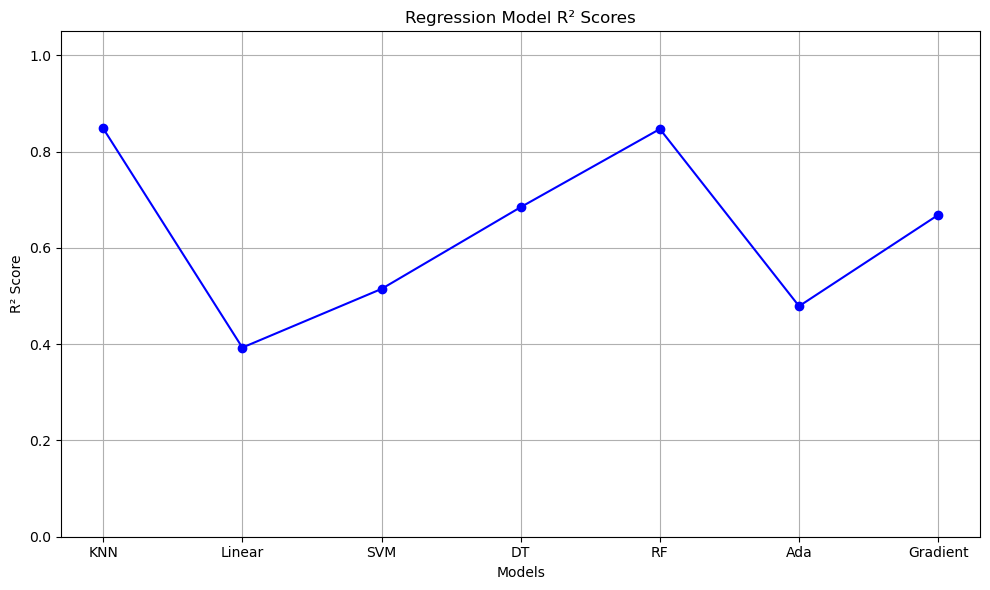

In [50]:
models = ['KNN', 'Linear', 'SVM', 'DT', 'RF', 'Ada', 'Gradient']
r2_scores = [
    r2_score(y_test, y_pred_knn),         
    r2_score(y_test, y_pred_lr),          
    r2_score(y_test, y_pred_svr),        
    r2_score(y_test, y_pred_dt),         
    r2_score(y_test, y_pred_rf),          
    r2_score(y_test, y_pred_ada),     
    r2_score(y_test, y_pred_gb),          
]
plt.figure(figsize=(10, 6))
plt.plot(models, r2_scores, marker='o', linestyle='-', color='b')
plt.title('Regression Model R² Scores')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()
